In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
df_train = pd.read_csv("train.csv",na_values=' ')
df_test = pd.read_csv("test.csv",na_values=' ')

In [2]:
t=[datetime.strptime(i, '%d/%m/%Y')for i in df_train['Date']]
df_train['Date']=t
t2=[datetime.strptime(i, '%d/%m/%Y')for i in df_test['Date']]
df_test['Date']=t2


df_train['month'] = df_train['Date'].dt.month
df_train['day'] = df_train['Date'].dt.day
df_train["year"]=df_train["Date"].dt.year
df_train['dow'] = df_train['Date'].dt.dayofweek


df_test['month'] = df_test['Date'].dt.month
df_test['day'] = df_test['Date'].dt.day
df_test["year"]=df_test["Date"].dt.year
df_test['dow'] = df_test['Date'].dt.dayofweek


<AxesSubplot:>

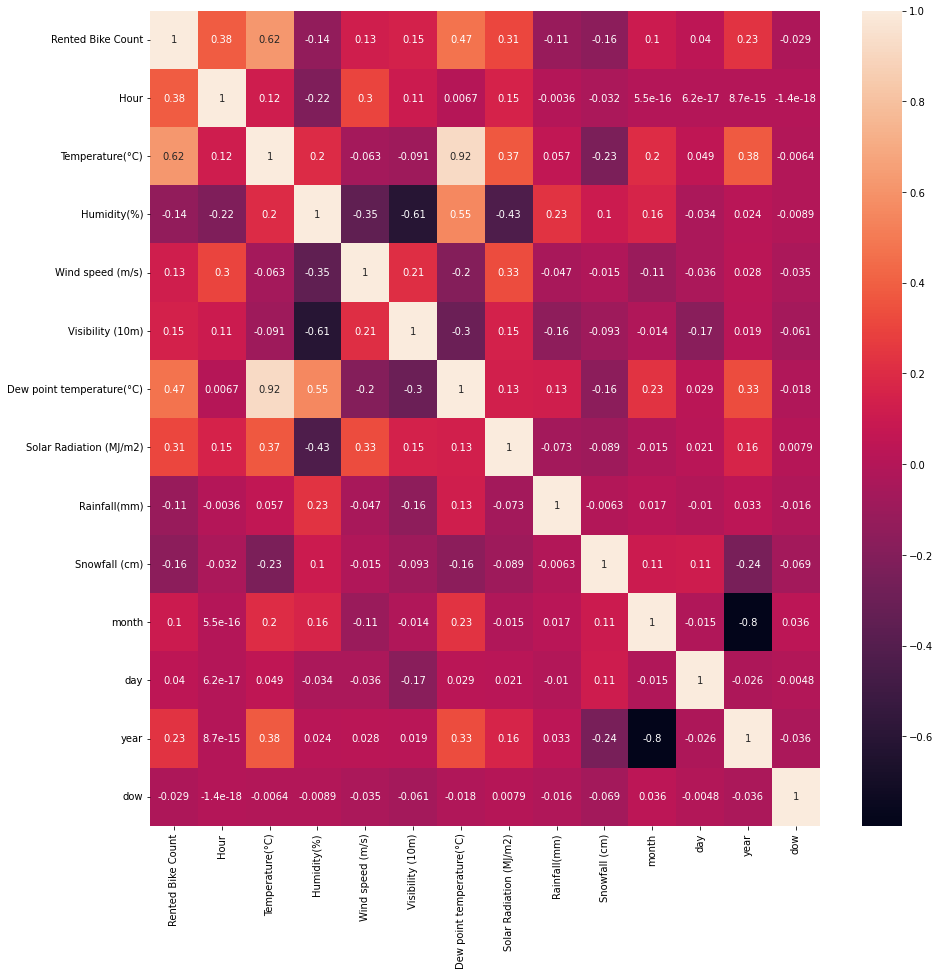

In [3]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True)

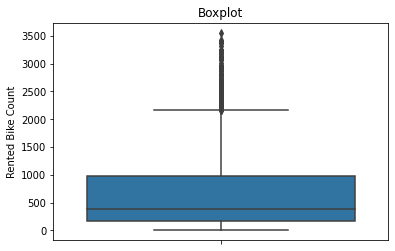

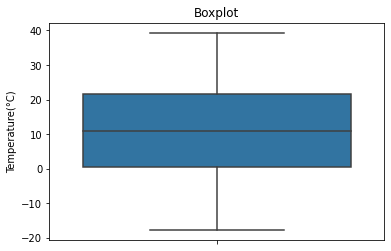

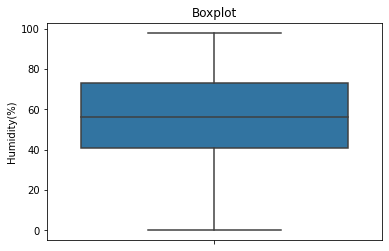

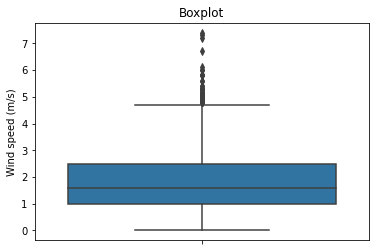

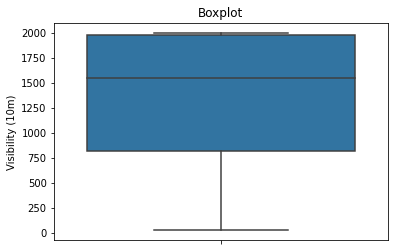

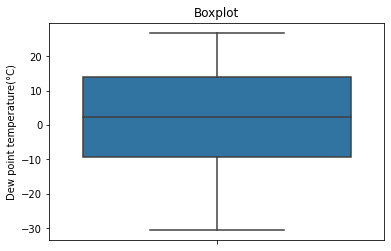

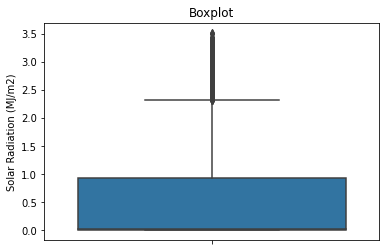

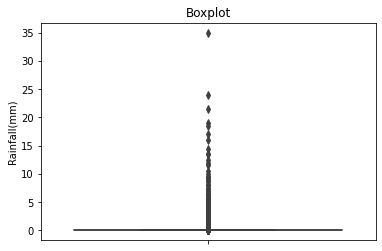

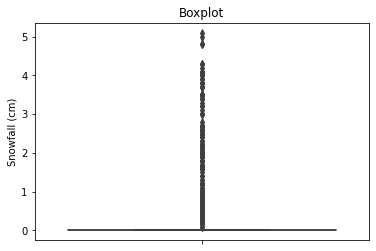

In [4]:
features_train = ['Rented Bike Count',  'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
 
# boxplot
for i in features_train:
    sns.boxplot(y=df_train[i])
    plt.title('Boxplot')
    plt.show()


In [5]:
features_outliers = ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Snowfall (cm)']

#Finding upper and lower limt for features in train set
for i in features_outliers:
    Inter_Quartile_Range = df_train[i].quantile(0.75) - df_train[i].quantile(0.25)

    lower_boundary = df_train[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df_train[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df_train[i]= np.where(df_train[i] > upper_boundary, upper_boundary,np.where(df_train[i] < lower_boundary,
                                                                                lower_boundary,df_train[i]))

In [6]:
#Finding upper and lower limt for features in test set
for i in features_outliers:
    Inter_Quartile_Range = df_test[i].quantile(0.75) - df_test[i].quantile(0.25)

    lower_boundary = df_test[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df_test[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df_test[i]= np.where(df_test[i] > upper_boundary, upper_boundary,np.where(df_test[i] < lower_boundary,
                                                                              lower_boundary,df_test[i]))

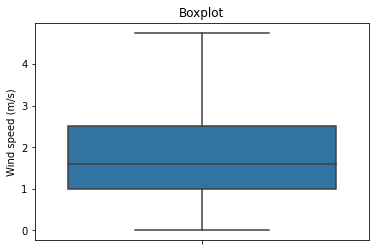

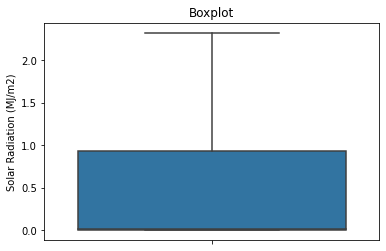

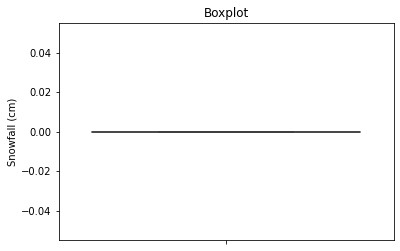

In [7]:
# boxplot
for i in features_outliers:
    sns.boxplot(y=df_train[i])
    plt.title('Boxplot')
    plt.show()


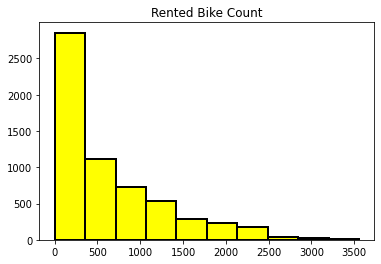

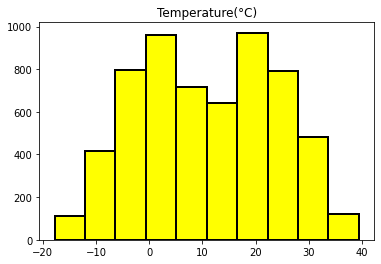

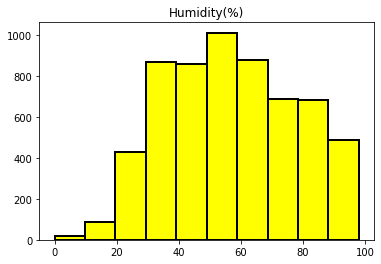

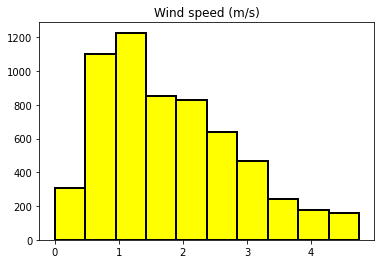

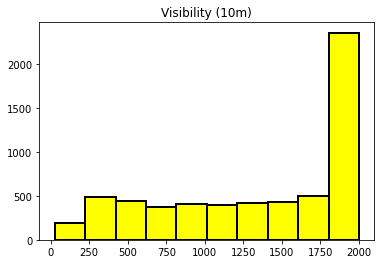

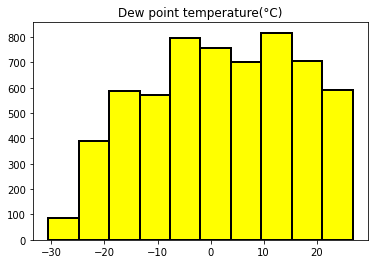

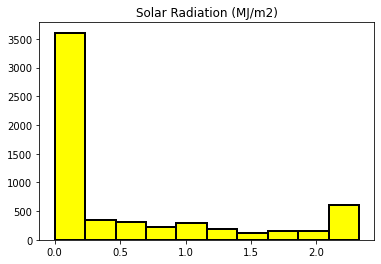

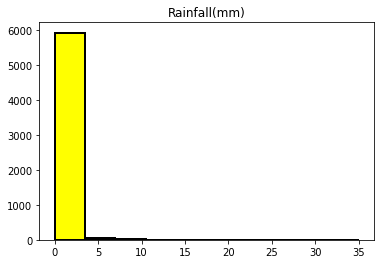

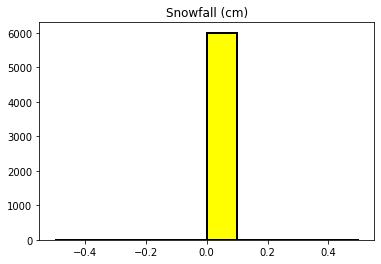

In [8]:
       
for i in features_train:
    plt.hist(df_train[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()
    

In [9]:
df_train['Rented Bike Count']=round(np.sqrt(df_train['Rented Bike Count']),1)
df_train['Wind speed (m/s)']=round(np.sqrt(df_train['Wind speed (m/s)']),1)
df_test['Wind speed (m/s)']=round(np.sqrt(df_test['Wind speed (m/s)']),1)

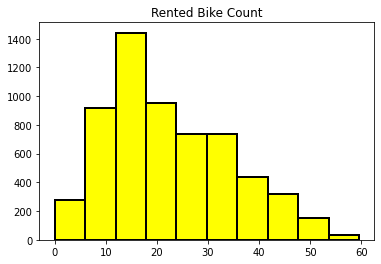

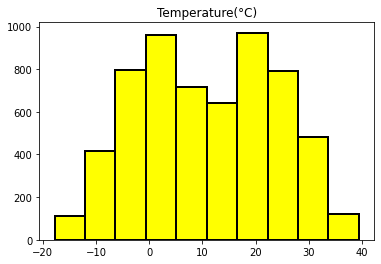

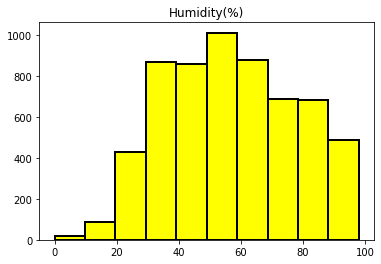

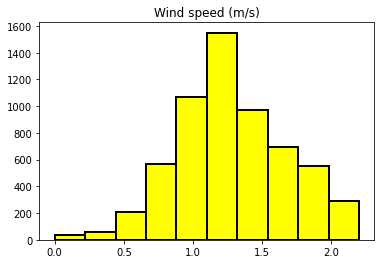

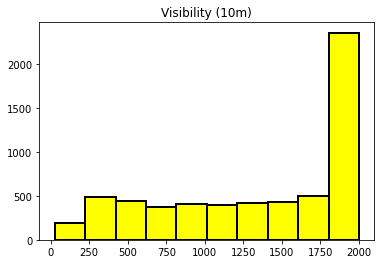

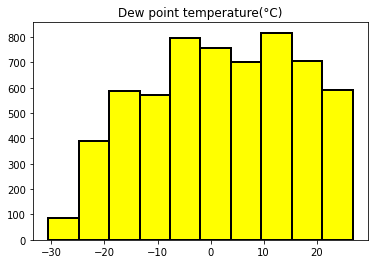

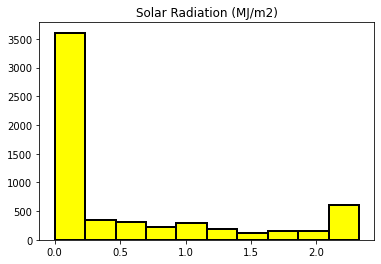

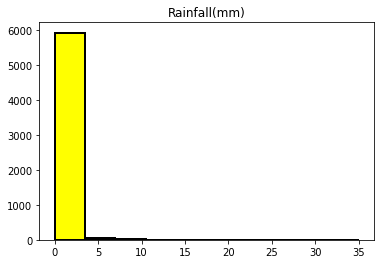

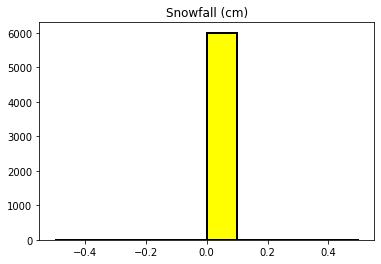

In [10]:
for i in features_train:
    plt.hist(df_train[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

In [11]:
df_test['Rented Bike Count'] = 0
df_train.drop(['Date'], inplace= True, axis = 1)
df_test.drop(['Date'], inplace= True, axis = 1)

In [12]:
seasons_encoding={'Winter':0, 'Spring':1, 'Summer':2,'Autumn':3}
Holiday_encoding={'No Holiday':0,'Holiday':1}
day_encode={'Yes':1,'No':2}
year_encode={2017:0,2018:1}

In [13]:
df_train['Seasons']=df_train["Seasons"].map(seasons_encoding)
df_test['Seasons']=df_test["Seasons"].map(seasons_encoding)

df_train['Holiday']=df_train["Holiday"].map(Holiday_encoding)
df_test['Holiday']=df_test["Holiday"].map(Holiday_encoding)

df_train['Functioning Day']=df_train["Functioning Day"].map(day_encode)
df_test['Functioning Day']=df_test["Functioning Day"].map(day_encode)

df_train['year']=df_train["year"].map(year_encode)
df_test['year']=df_test["year"].map(year_encode)

In [14]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [15]:
x_train = df_train.drop(['Rented Bike Count'], axis=1)
y_train = df_train['Rented Bike Count']
x_test = df_test.iloc[:,1:-1]
y_test = df_test.iloc[:,14:]

In [16]:
from sklearn.model_selection import train_test_split  

x_train_train, x_test_train, y_train_train, y_test_train= train_test_split(x_train, y_train, test_size= 0.001, random_state=42)  

np.shape(y_train_train)


(5994,)

In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'iterations':np.arange(1000,5000,1000), 'learning_rate':np.arange(0,0.1,0.01),
              'objective':['MAE','MAPE','Poisson','Quantile','RMSE','RMSEWithUncertainty',
                           'LogLinQuantile','Lq','Huber','Expectile','Tweedie','LogCosh'],
             'l2_leaf_reg':np.arange(1,5,1),'random_strength':[0,1,2,3,4,5],'random_state':[42,0,1]}
# model = CatBoostRegressor()
# clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,cv=5,verbose=3)
# bm = clf.fit(x_train_train, y_train_train)
# sorted(clf.cv_results_)
# print(bm.best_params_)

In [18]:
#print(bm.best_params_)

In [19]:
# importing machine learning models for prediction
#from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor, BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR, LinearSVR

import xgboost as xgb
# initializing all the model objects with default parameters
model = CatBoostRegressor(random_strength=1, random_state=1, objective='LogCosh', iterations=4000,learning_rate=0.052, silent=True)
# training all the model on the training dataset
model.fit(x_train, y_train)
# predicting the output on the validation dataset
pred = model.predict(x_test)
y_pred = model.predict(x_train_train)
y_pred2 = model.predict(x_test_train)

# printing the root mean squared error between real value and predicted value
print('Accuracy of model on train set: {:.2f}'.format(model.score(x_train_train, y_train_train)))
print('Accuracy of model on test set: {:.2f}'.format(model.score(x_test_train, y_test_train)))
print('mse of model on train set: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_train, y_pred))))
print('mse of model on test set: {:.2f}'.format(np.sqrt(mean_squared_error(y_test_train, y_pred2))))

Accuracy of model on train set: 0.99
Accuracy of model on test set: 1.00
mse of model on train set: 1.02
mse of model on test set: 0.29


In [20]:
df_test['Rented Bike Count'] = pred
df_test['Rented Bike Count']=round(df_test['Rented Bike Count']**2,1)

df_test.drop(df_test.iloc[:,1:-1], inplace= True, axis = 1)
df_test.to_csv('Best199.csv', index=False)

In [21]:
df = pd.read_csv("Best199.csv",na_values=' ')
df

,ID,Rented Bike Count
0,0,894.0
1,1,652.8
2,2,429.4
3,3,299.3
4,4,189.6
...,...,...
2755,2755,901.1
2756,2756,782.8
2757,2757,782.9
2758,2758,754.4


In [22]:
df = pd.read_csv("Best199.csv",na_values=' ')
df2 = pd.read_csv("199.csv",na_values=' ')
x=df['Rented Bike Count']
x2=df2['Rented Bike Count']
x2

0       894.0
1       652.8
2       429.4
3       299.3
4       189.6
        ...  
2755    901.1
2756    782.8
2757    782.9
2758    754.4
2759    662.0
Name: Rented Bike Count, Length: 2760, dtype: float64

In [23]:
print('mse of two models gbr: {:.2f}'.format(np.sqrt(mean_squared_error(x2, x))))

mse of two models gbr: 0.00
